# External Lab 

Here each question is of 1 mark.

# Multiple Linear Regression

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro, f_oneway,binom
from sklearn.linear_model import LinearRegression

In [25]:
pdf = pd.read_csv('petrol.csv')
pdf.head()
pdf.describe()

,tax,income,highway,dl,consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

In [26]:
pdf.head()
pdf.shape
pdf.columns
pdf.dtypes

tax            float64
income           int64
highway          int64
dl             float64
consumption      int64
dtype: object

In [27]:
Q1 = pdf['tax'].quantile(0.25)
Q3 = pdf['tax'].quantile(0.75)
IQR = Q3 - Q1
print("Inter Quartile is {}".format(IQR))

Inter Quartile is 1.125


In [28]:
filtered = pdf.query('(@Q1 - 1.5 * @IQR) <= tax <= (@Q3 + 1.5 * @IQR)')
filtered.shape

(46, 5)

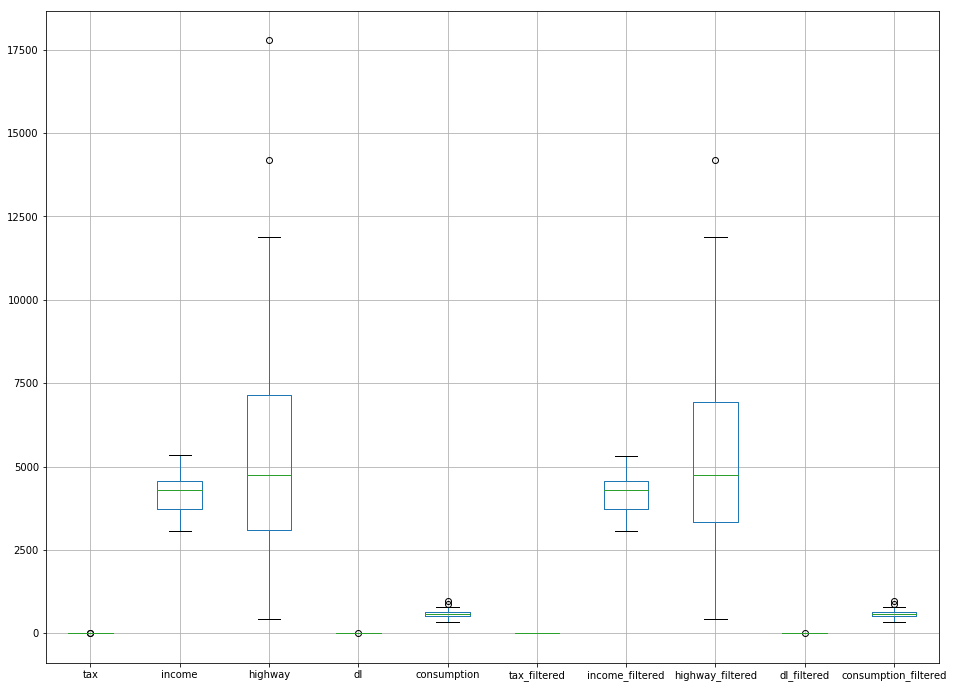

In [43]:

pdf.join(filtered, rsuffix='_filtered').boxplot(figsize=(16,12))
#plt.boxplot(filtered,width=100)

In [35]:
filtered.shape

(46, 5)

# Question 3 - Independent variables and collinearity 
Which attributes seems to have stronger association with the dependent variable consumption?

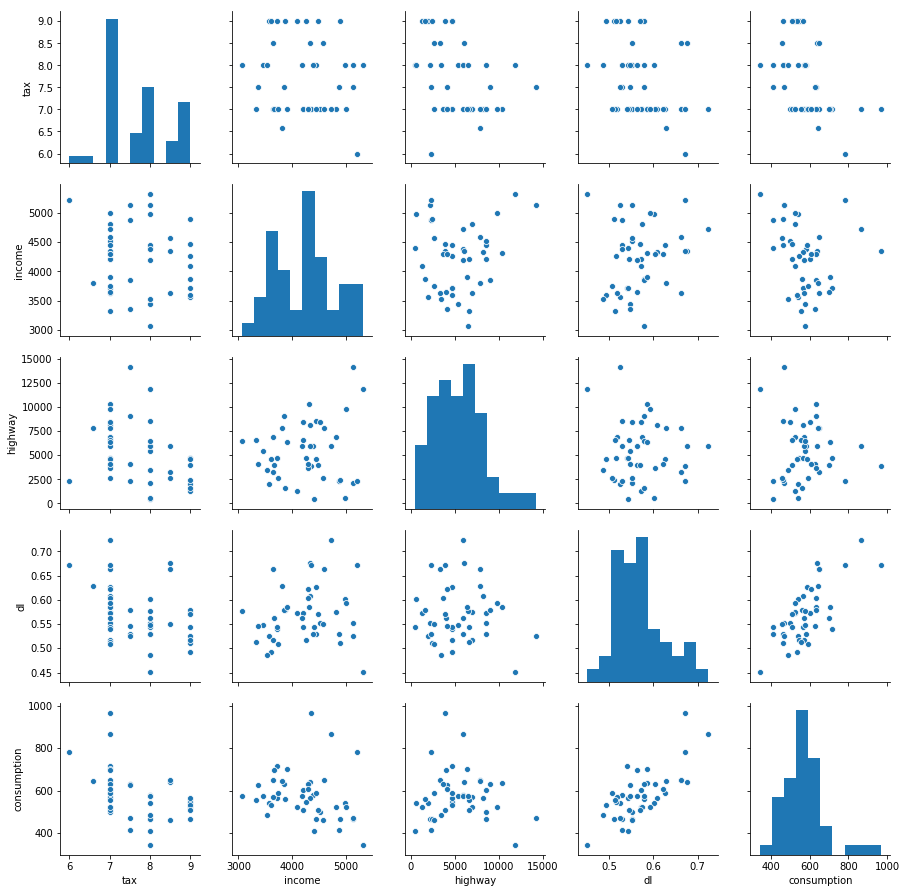

In [45]:
sns.pairplot(filtered)

In [47]:
import sympy
reduced_form, inds = sympy.Matrix(filtered.values).rref()
reduced_form

Matrix([
[1, 0, 0, 0, 0],
[0, 1, 0, 0, 0],
[0, 0, 1, 0, 0],
[0, 0, 0, 1, 0],
[0, 0, 0, 0, 1],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0]])

In [48]:
inds

(0, 1, 2, 3, 4)

In [50]:
filtered.corr(method ='pearson')

,tax,income,highway,dl,consumption
tax,1.000000,-0.133854,-0.353946,-0.349536,-0.437944
income,-0.133854,1.000000,0.153428,0.162882,-0.208562
highway,-0.353946,0.153428,1.000000,-0.068962,-0.060593
dl,-0.349536,0.162882,-0.068962,1.000000,0.711431
consumption,-0.437944,-0.208562,-0.060593,0.711431,1.000000


### Observing the above correlation values between all the variables, we can see that there is stronger association between the number of drivers and consumption. And comparatively tax has an association in a negative way. 
Insights :
As tax increases the consumption decreases.
As number of drivers is more consumption is more

In [51]:
#Tax and Consumption is lowest =-0.437944 negatively coorelated
#Number of drivers  and Consumption is lowest =0.711431 Positively coorelated

# Question 4 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

In [56]:
Y=filtered.consumption
Y.head()
filtered.drop('consumption',axis=1, inplace=True)
filtered.head()

C:\Users\kotav\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,tax,income,highway,dl
0,9.0,3571,1976,0.525
1,9.0,4092,1250,0.572
2,9.0,3865,1586,0.580
3,7.5,4870,2351,0.529
4,8.0,4399,431,0.544


X Training Shape is (36, 5) and Y Shape is (36,) 
X Testing Shape is (10, 5) and Y Shape is (10,) 


# Question 5 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [54]:
X_train, X_test, y_train, y_test = train_test_split(filtered, Y, test_size=0.2)
print ("X Training Shape is {} and Y Shape is {} ".format(X_train.shape, y_train.shape))
print ("X Testing Shape is {} and Y Shape is {} ".format(X_test.shape, y_test.shape))

X Training Shape is (36, 5) and Y Shape is (36,) 
X Testing Shape is (10, 5) and Y Shape is (10,) 


# Question 6 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [58]:
regr = LinearRegression()
regr.fit(filtered, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [59]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 410.19456290371636
Coefficients: 
 [-3.73308148e+01 -6.91172018e-02 -2.14982636e-03  1.32844380e+03]


# R-Square 

# Question 7 - Evaluate the model 
Calculate the accuracy score for the above model.

In [63]:
r_sq = regr.score(filtered, Y)
print('coefficient of determination:',r_sq)

coefficient of determination: 0.6699167969791406


In [65]:
y_pred = regr.predict(filtered)
print('predicted response:', y_pred, sep='\n')

predicted response:
[520.58464135 548.57221187 574.16702545 491.30520879 529.24832706
 317.52766374 487.28636199 488.49155884 552.03445086 499.36180787
 442.854235   563.56974413 567.95880618 639.6165397  606.66964559
 599.75104084 599.10282673 771.99922566 679.28086187 695.34005275
 565.56600146 409.32015067 456.64754387 503.08269589 529.50247433
 589.61222385 614.07807871 557.15385158 470.25228794 570.58158336
 585.82694129 653.65710597 615.9863309  507.14104512 720.5236123
 644.27055078 715.36131801 732.88378077 663.00920431 635.53317221
 644.91188558 559.27119351 713.52880168 514.91543003 670.79410823
 569.86639137]


In [67]:
y_pred = regr.intercept_ + regr.coef_ * filtered
print('predicted response:', y_pred, sep='\n')

predicted response:
           tax      income     highway           dl
0    74.217229  163.377035  405.946506  1107.627559
1    74.217229  127.366973  407.507280  1170.064418
2    74.217229  143.056578  406.784938  1180.691968
3   130.213452   73.593790  405.140321  1112.941335
4   111.548044  106.147992  409.267988  1132.867992
6   111.548044   42.560167  384.680424  1009.322718
7   111.548044   55.899787  405.598234  1144.823986
8   111.548044  102.830367  391.755502  1112.941335
9   148.878859   98.337748  391.905990  1143.495542
10  111.548044  106.700930  397.426744  1114.269778
11  130.213452   55.899787  379.697126  1107.627559
12  148.878859   77.257002  395.296266  1172.721306
13  148.878859  119.418495  396.048705  1134.196435
14  148.878859  110.778845  392.654130  1217.888395
15  148.878859  111.746486  387.965358  1188.662631
16  148.878859  119.487612  391.903840  1170.064418
17  148.878859  153.216807  400.036633  1127.554216
18  148.878859   84.237839  397.478340  1371

# Question 8: Repeat the same Multi linear regression modelling by adding both Income and Highway features
Find R2 


# Question 9: Print the coefficients of the multilinear regression model

# Question 10 
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer

### *R squared value increase if we increase the number of independent variables to our analysis